<a href="https://colab.research.google.com/github/edleafvirtual/sales_predictions2023/blob/main/sales_prediction2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Prediction
- Eduardo Galindez.
- Data Scientist from Coding Dojo.

**Data for sales prediction.**

Source: https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

In [1]:
# Importing libraries.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# Loading data.
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ4Zu6xL-qFpsuyhrkLDnQK07Y3-JRmE8hQtNQp7JJ-3TBq3FI4m0Cjk9i87aReHTPu7Xr02qS6iY0y/pub?gid=257468944&single=true&output=csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Cleaning the data

In [3]:
# In general, we have.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
df.describe(include = "all").round(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.00,8523,8523.00,8523,8523.00,8523,8523.00,6113,8523,8523,8523.00
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.86,NaN,0.07,NaN,140.99,NaN,1997.83,NaN,NaN,NaN,2181.29
std,NaN,4.64,NaN,0.05,NaN,62.28,NaN,8.37,NaN,NaN,NaN,1706.50
min,NaN,4.56,NaN,0.00,NaN,31.29,NaN,1985.00,NaN,NaN,NaN,33.29
25%,NaN,8.77,NaN,0.03,NaN,93.83,NaN,1987.00,NaN,NaN,NaN,834.25
50%,NaN,12.60,NaN,0.05,NaN,143.01,NaN,1999.00,NaN,NaN,NaN,1794.33
75%,NaN,16.85,NaN,0.09,NaN,185.64,NaN,2004.00,NaN,NaN,NaN,3101.30


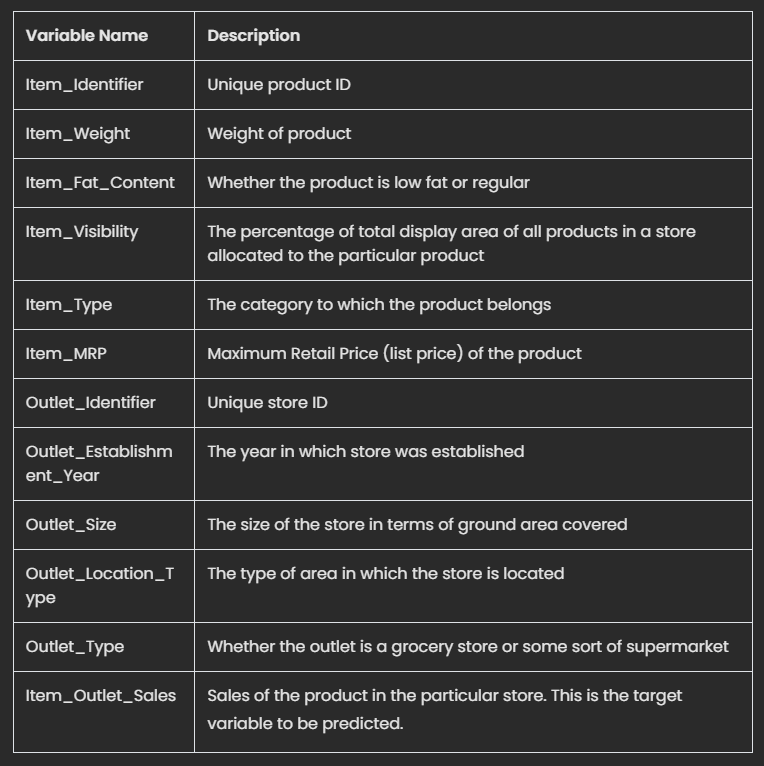

In [5]:
# We have 12 columns and 8523 entries.
df.shape

(8523, 12)

In [6]:
# Looking for missing values. Identifying dtypes.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# We didn't find dupicate values
bool_series = df.duplicated()
bool_series.sum()

0

In [8]:
# Let's see how many values are missing from 'Item_Weight' and 'Outlet_Size'
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# Calculating the impact of missing data.

# Item Weight
miss_weight_data = 1463 / 8523

print(f"The missing data from 'Item_Weight' represents the", (miss_weight_data * 100), "%.")

# Item Size
miss_size_data = 2410 / 8523 * 100
print(f"The {miss_size_data}% of the data is missing from column Outlet_Size.")

The missing data from 'Item_Weight' represents the 17.165317376510618 %.
The 28.27642848762173% of the data is missing from column Outlet_Size.


In [10]:
# My job is to predict how the sales will be in 2023, so the weight of the product is not a variable that will influence the sales.
# For that reason, we decided to drop the rows with this issue.

df.dropna(subset = ["Item_Weight"],inplace = True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
# Checking the general info of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7060 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           7060 non-null   object 
 3   Item_Visibility            7060 non-null   float64
 4   Item_Type                  7060 non-null   object 
 5   Item_MRP                   7060 non-null   float64
 6   Outlet_Identifier          7060 non-null   object 
 7   Outlet_Establishment_Year  7060 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       7060 non-null   object 
 10  Outlet_Type                7060 non-null   object 
 11  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 717.0+ KB


In [12]:
# About the Outlet Size, it's a variable that could influence the sales. In this case we decided to fill missing data with the average size of the stores (Medium).

# First let's have a look about the values inside the column 'Outlet_Size'
df["Outlet_Size"].value_counts()

Small     1860
Medium    1858
High       932
Name: Outlet_Size, dtype: int64

In [13]:
# Now that we fill empty values with 'Medium' category.
df['Outlet_Size'].fillna('Medium', inplace=True)
df["Outlet_Size"].value_counts()


Medium    4268
Small     1860
High       932
Name: Outlet_Size, dtype: int64

In [14]:
# Checking the general info of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7060 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           7060 non-null   object 
 3   Item_Visibility            7060 non-null   float64
 4   Item_Type                  7060 non-null   object 
 5   Item_MRP                   7060 non-null   float64
 6   Outlet_Identifier          7060 non-null   object 
 7   Outlet_Establishment_Year  7060 non-null   int64  
 8   Outlet_Size                7060 non-null   object 
 9   Outlet_Location_Type       7060 non-null   object 
 10  Outlet_Type                7060 non-null   object 
 11  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 717.0+ KB


In [15]:
# Now, let's have a quick look about any inconsistent category in our dataframe.
df.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600       LF                0.000000         Soft Drinks   141.9154  OUT035             2004                       Small        Tier 2                Supermarket Type1  992.7078             1
FDV25            5.905        Low Fat           0.045838         Canned        222.5456  OUT018             2009                       Medium       Tier 3                Supermarket Type2  3315.6840            1
FDV28            16.100       Regular           0.159595         Frozen Foods  32.8558   OUT013             1987                       High         Tier 3                Supermarket Type1  339.5580             1
                                                0.000000         Frozen Foods  35.1558   OUT017             2007                       Medium       Tier 2   

In [16]:
# We identified some issues in 'Item_Fat_Content' column. Let's have a closer look.
df["Item_Fat_Content"].value_counts()

Low Fat    4222
Regular    2388
LF          260
reg         106
low fat      84
Name: Item_Fat_Content, dtype: int64

In [17]:
# In order to fix this inconsistency, we are going to leave only two categories: Low Fat, and Regular.
repl_low1 = {"LF":"Low Fat"}
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(repl_low1)

repl_low2 = {"low fat":"Low Fat"}
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(repl_low2)

repl_reg = {"reg":"Regular"}
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace(repl_reg)

df["Item_Fat_Content"].value_counts()

Low Fat    4566
Regular    2494
Name: Item_Fat_Content, dtype: int64

In [18]:
# Let's see how looks our clean dataframe.
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [19]:
help(df.to_csv);

Help on method to_csv in module pandas.core.generic:

to_csv(path_or_buf: 'FilePathOrBuffer[AnyStr] | None' = None, sep: 'str' = ',', na_rep: 'str' = '', float_format: 'str | None' = None, columns: 'Sequence[Hashable] | None' = None, header: 'bool_t | list[str]' = True, index: 'bool_t' = True, index_label: 'IndexLabel | None' = None, mode: 'str' = 'w', encoding: 'str | None' = None, compression: 'CompressionOptions' = 'infer', quoting: 'int | None' = None, quotechar: 'str' = '"', line_terminator: 'str | None' = None, chunksize: 'int | None' = None, date_format: 'str | None' = None, doublequote: 'bool_t' = True, escapechar: 'str | None' = None, decimal: 'str' = '.', errors: 'str' = 'strict', storage_options: 'StorageOptions' = None) -> 'str | None' method of pandas.core.frame.DataFrame instance
    Write object to a comma-separated values (csv) file.
    
    Parameters
    ----------
    path_or_buf : str or file handle, default None
        File path or object, if None is provided the

# Statistical analysis

In [20]:
# Now that our dataframe is clean, let's see its descriptive statistic summary.
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,7060,7060.000000,7060,7060.000000,7060,7060.000000,7060,7060.000000,7060,7060,7060,7060.000000
unique,1555,NaN,2,NaN,16,NaN,8,NaN,3,3,3,NaN
top,FDF22,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT013,NaN,Medium,Tier 2,Supermarket Type1,NaN
freq,8,NaN,4566,NaN,1019,NaN,932,NaN,4268,2785,5577,NaN
mean,NaN,12.857645,NaN,0.063963,NaN,141.240683,NaN,2000.490935,NaN,NaN,NaN,2118.626808
std,NaN,4.643456,NaN,0.048625,NaN,62.411888,NaN,6.588984,NaN,NaN,NaN,1533.445842
min,NaN,4.555000,NaN,0.000000,NaN,31.490000,NaN,1987.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026768,NaN,94.143600,NaN,1997.000000,NaN,NaN,NaN,922.798800
50%,NaN,12.600000,NaN,0.052493,NaN,142.729900,NaN,2002.000000,NaN,NaN,NaN,1789.670400
75%,NaN,16.850000,NaN,0.092774,NaN,186.024000,NaN,2007.000000,NaN,NaN,NaN,2966.139000


In context:
- We have three variables that we consider that would affect the sales volume (Variables Type A):
 - Item_Visibility.
 - Item_Type.
 - Item_MRP.

- We identified three variables that could affect the sales behavior (Variables Type B):
 - Outlet_Size.
 - Outlet_Location_Type.
 - Outlet_Type.

In the current analysis, we are going to work with the variables decrypted above to compare their relationship with Item_Outlet_Sales.

**Exploring data of Variables Type A**

In [21]:
# Checking the categories inside 'Item_Visibility' column.
df['Item_Visibility'].value_counts().sort_values(ascending=False)

0.000000    436
0.076975      3
0.034868      2
0.080766      2
0.107274      2
           ... 
0.042716      1
0.014072      1
0.049548      1
0.146172      1
0.044878      1
Name: Item_Visibility, Length: 6519, dtype: int64

In [22]:
# Checking the categories inside 'Item_Type' column.
df['Item_Type'].value_counts().sort_values(ascending=False)

Fruits and Vegetables    1019
Snack Foods               988
Household                 759
Frozen Foods              718
Dairy                     566
Canned                    539
Baking Goods              536
Health and Hygiene        430
Soft Drinks               374
Meat                      337
Breads                    204
Hard Drinks               183
Others                    137
Starchy Foods             130
Breakfast                  89
Seafood                    51
Name: Item_Type, dtype: int64

In [23]:
# Checking the categories inside 'Item_MRP' column.
df['Item_MRP'].value_counts().sort_values(ascending=False)

170.5422    6
196.5768    6
142.0154    6
152.8366    5
37.9532     5
           ..
34.3558     1
152.9340    1
31.4900     1
44.4086     1
75.4670     1
Name: Item_MRP, Length: 5225, dtype: int64

In [24]:
# Notes from the results (series):
#   Looks like 436 items have 0 visibility.
#   A Pareto Plot for 'Item_Type' would gave me a better idea what kind of product type Big Mart sales more.
#         Our Pareto Plot is inspired by the code developed by Zack displayed on https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/
#   We could check the relationship between the Pareto result vs 'Item_MRP'.

In [25]:
# Let's plot a Pareto for 'Item_Type'.

df['Item_Type'].value_counts().sort_values(ascending=False)

Fruits and Vegetables    1019
Snack Foods               988
Household                 759
Frozen Foods              718
Dairy                     566
Canned                    539
Baking Goods              536
Health and Hygiene        430
Soft Drinks               374
Meat                      337
Breads                    204
Hard Drinks               183
Others                    137
Starchy Foods             130
Breakfast                  89
Seafood                    51
Name: Item_Type, dtype: int64

In [26]:
# Creating a new dataframe, taking as a reference the series above.
pareto_df = pd.DataFrame({'Count': [1019,988,759,718,566,539,536,430,374,337,204,183,137,130,89,51]})
pareto_df.index = ['Fruits & Veg.','Snack Foods','Household','Frozen Foods','Dairy','Canned','Baking Goods','Health and Hyg.','Soft Drinks','Meat','Breads','Hard Drinks','Others','Starchy Foods','Breakfast','Seafood']
pareto_df

,Count
Fruits & Veg.,1019
Snack Foods,988
Household,759
Frozen Foods,718
Dairy,566
Canned,539
Baking Goods,536
Health and Hyg.,430
Soft Drinks,374
Meat,337


In [27]:
# Add a column to display cumulative percentage.
pareto_df['%Cum'] = pareto_df['Count'].cumsum() / pareto_df['Count'].sum() * 100
pareto_df

,Count,%Cum
Fruits & Veg.,1019,14.433428
Snack Foods,988,28.427762
Household,759,39.178470
Frozen Foods,718,49.348442
Dairy,566,57.365439
Canned,539,65.000000
Baking Goods,536,72.592068
Health and Hyg.,430,78.682720
Soft Drinks,374,83.980170
Meat,337,88.753541


In [28]:
# From the result above, we know already in Soft Drinks we found the ~20% of the items that represent ~83% of the items sold.

# Let's continue with our graph.

In [29]:
# We imported matplotlib already, but let's bring a helper.
from matplotlib.ticker import PercentFormatter

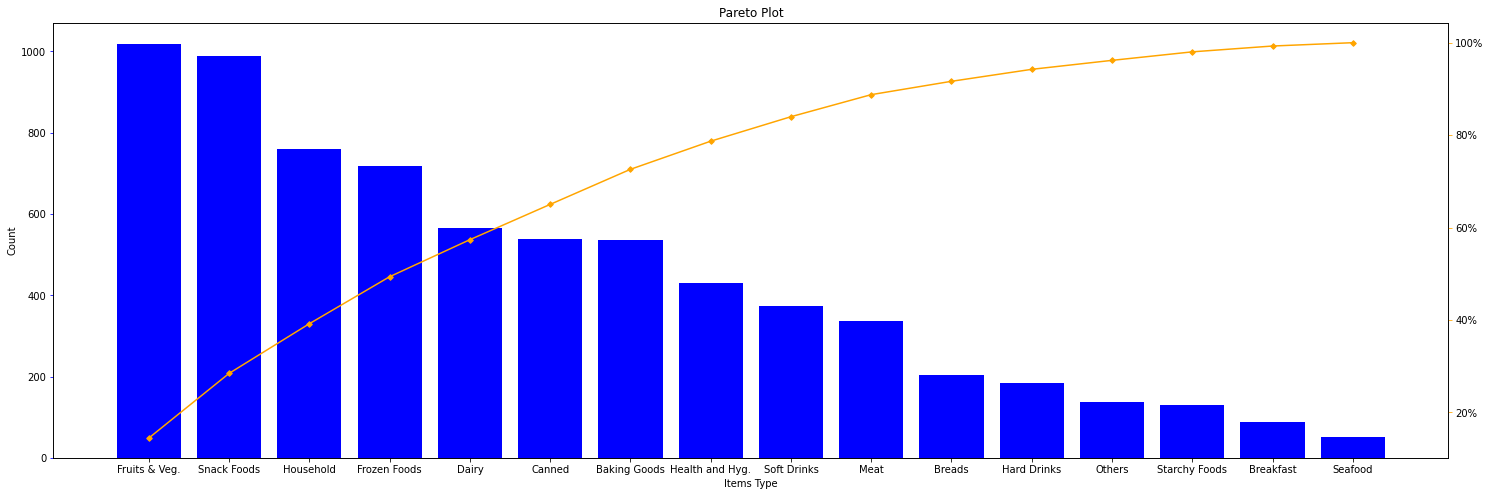

In [30]:
# Defining aesthetics for our plot.
color1 = 'blue'
color2 = 'orange'
line_size = 4

# Creating a basic bar plot, using Pandas.
fig, ax = plt.subplots(figsize=(25,8))
ax.bar(pareto_df.index, pareto_df['Count'], color=color1)
ax.set(xlabel='Items Type', ylabel='Count', title='Pareto Plot')

# Adding the line that will indicate how the percentage is cumulative.
# Remember that in Pareto, we are looking for the 80% cumulative in order to have the 20% of the items that generate ~80% of the sales.
ax2 = ax.twinx()
ax2.plot(pareto_df.index, pareto_df['%Cum'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

# Specify axis colors.
ax.tick_params(axis='y', color=color1)
ax2.tick_params(axis='y', color=color2)

# Now, let's display our amazing plot.
plt.show()

In [31]:
# So, we know if we want to analyze the relationship between the price (Item_MRP) and products (Item_Type),
# it would have more impact if we exclude: Meat, Breads, Hard Drinks, Others, Starchy Foods, Breackfast, and Seafood.

**Exploring data of Variables Type B**

In [32]:
# Checking the categories inside 'Outlet_Size' column.
df['Outlet_Size'].value_counts().sort_values(ascending=False)

Medium    4268
Small     1860
High       932
Name: Outlet_Size, dtype: int64

In [33]:
# Checking the categories inside 'Outlet_Location_Type' column.
df['Outlet_Location_Type'].value_counts().sort_values(ascending=False)

Tier 2    2785
Tier 3    2415
Tier 1    1860
Name: Outlet_Location_Type, dtype: int64

In [34]:
# Checking the categories inside 'Outlet_Type' column.
df['Outlet_Type'].value_counts().sort_values(ascending=False)

Supermarket Type1    5577
Supermarket Type2     928
Grocery Store         555
Name: Outlet_Type, dtype: int64

In [35]:
# Notes from the results (series):
#   The 'Medium' size of the stores, has the majority of the entries. 
#     - But, remember that we had 2,410 missing values on 'Outlet_Size' and we decided to fill in with 'Medium'.
#     - So before the filling, the values were (in descending): Small: 1,860, Medium: 1,858, High: 932.
#     - Now 'Medium' is in the first place, and we agreed to work with that because we want to help the stores with medium size to improve their sales.
#   The stores located at 'Tier 2' reported more entries.
#   The store's type 'Supermarket Type1' have more entries than the other two types sum together (1,483 entries).

In [36]:
# Let's filter our data to see where 'Supermarket Type1' is located.
supermarket_type1_filter = df['Outlet_Type'] == "Supermarket Type1"
a_df = df.loc[supermarket_type1_filter, :]
a_df['Outlet_Location_Type'].value_counts()

Tier 2    2785
Tier 1    1860
Tier 3     932
Name: Outlet_Location_Type, dtype: int64

In [37]:
# So, 'Supermarket Type1' is located in 'Tier 2' and 'Tier 1' if we compare the results between df and a_df.

# Let's create another filter to confirm our statement.
tier_filter = df['Outlet_Location_Type'] == "Tier 3"
df.loc[tier_filter, :]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
...,...,...,...,...,...,...,...,...,...,...,...,...
8512,FDR26,20.700,Low Fat,0.042801,Dairy,178.3028,OUT013,1987,High,Tier 3,Supermarket Type1,2479.4392
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834


In [38]:
# Now, let's combine our filters and the some more values.
combine1_filter = df.loc[tier_filter & ~supermarket_type1_filter, :]
combine1_filter['Outlet_Type'].value_counts()

Supermarket Type2    928
Grocery Store        555
Name: Outlet_Type, dtype: int64

In [39]:
combine1_filter['Outlet_Type'].value_counts().sum()

1483

In [40]:
df['Outlet_Type'].value_counts().sum() - a_df['Outlet_Location_Type'].value_counts().sum()

1483

In [41]:
# Our statement is confirmed.

In [42]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Graph analysis

**HISTOGRAMS**
- In order to view the different distributions in our dataframe, let's plot some histograms.



**Exploring data of Variables Type A**

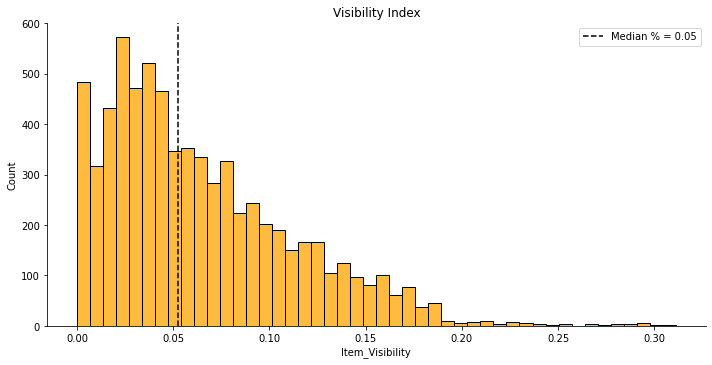

In [43]:
# Let's plot a histogram for 'Item_Visibility'.
vis = sns.displot(data=df, x='Item_Visibility', aspect=2, bins='auto', color='orange')
vis.ax.set(title='Visibility Index')
median = df['Item_Visibility'].median()
vis.ax.axvline(median, color='black', linestyle='--', label=f"Median % = {median:,.2f}")
vis.ax.legend();

In [44]:
# From our histogram, we can see that we must improve the visibility of the products in order to increase the sales.
# The graph confirms what we reported on the code line [24].

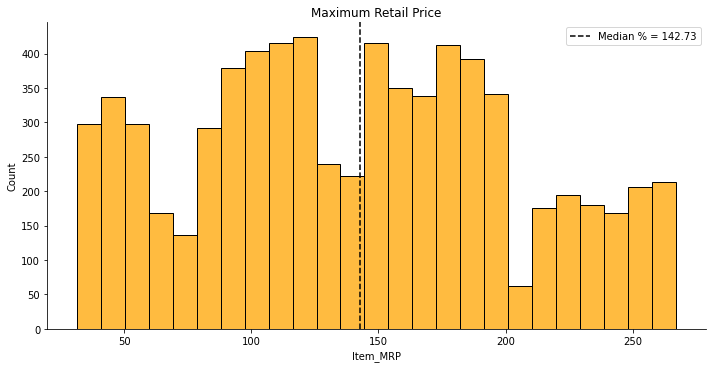

In [45]:
# Let's plot a histogram for 'Item_MRP'.
mrp = sns.displot(data=df, x='Item_MRP', aspect=2, bins='auto', color='orange')
mrp.ax.set(title='Maximum Retail Price')
median = df['Item_MRP'].median()
mrp.ax.axvline(median, color='black', linestyle='--', label=f"Median % = {median:,.2f}")
mrp.ax.legend();

In [46]:
# Later we could deeper into the analysis of MRP because maybe the price per item is mature enough to suggest a change.

**Exploring data of Variables Type B**

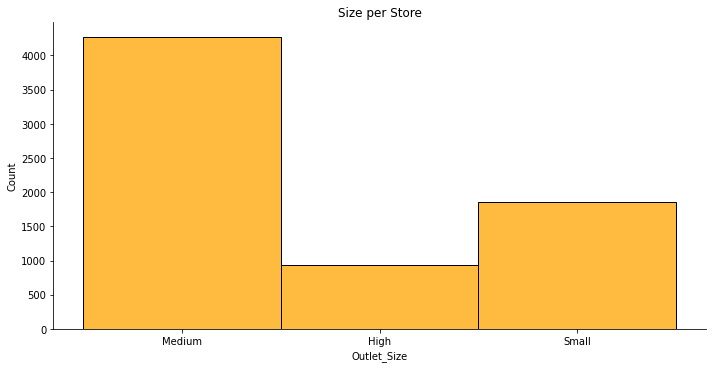

In [47]:
# Let's plot a histogram for 'Outlet_Size'.
size = sns.displot(data=df, x='Outlet_Size', aspect=2, bins='auto', color='orange')
size.ax.set(title='Size per Store');

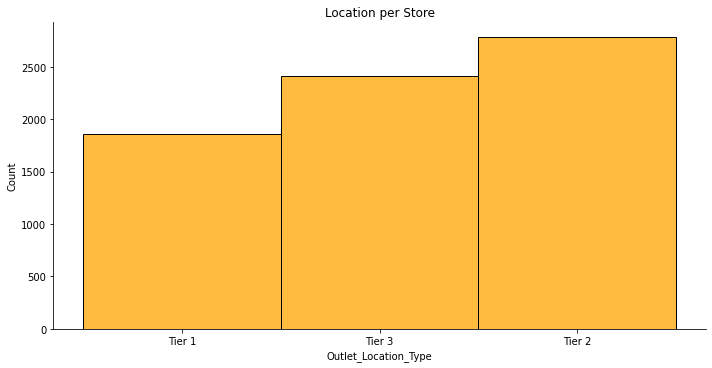

In [48]:
# Let's plot a histogram for 'Outlet_Location_Type'.
location = sns.displot(data=df, x='Outlet_Location_Type', aspect=2, bins='auto', color='orange')
location.ax.set(title='Location per Store');

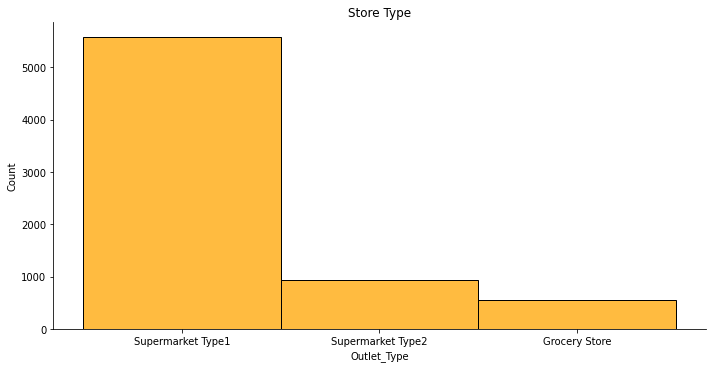

In [49]:
# Lets' plot a histogram for 'Outlet_Type'.
storetype = sns.displot(data=df, x='Outlet_Type', aspect=2, bins='auto', color='orange')
storetype.ax.set(title='Store Type');

In [50]:
# The statistical analysis that we made before, is confirmed in our plots.

**BOXPLOT**
- In order to view statistical summaries of various features in our dataset, let's plot some boxplots.



**Exploring data of Variables Type A**

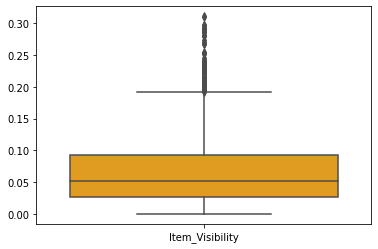

In [51]:
# Let's plot a boxplot for 'Item_Visibility'.
sns.boxplot(data=df.loc[:, ['Item_Visibility']], color='orange')
sns.set(rc={'figure.figsize':(8,8)})

In [52]:
# Seeing in graph that we have outliers, make us keep the focus on this variable.

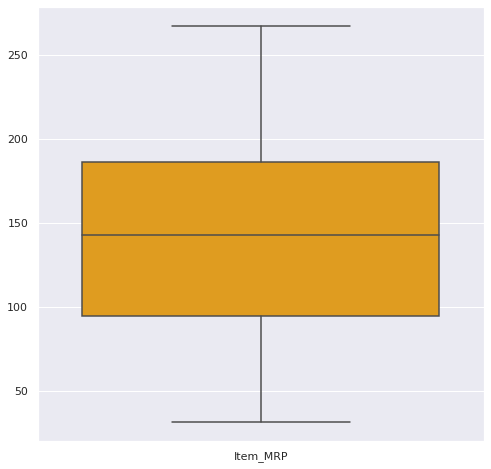

In [53]:
# Let's plot a boxplot for 'Item_MRP'.
sns.boxplot(data=df.loc[:, ['Item_MRP']], color='orange')
sns.set(rc={'figure.figsize':(8,8)})

In [54]:
# As we reported in code line [46], the List Price looks normalized.

**HEATMAP**
- In order to see the correlation between features, let's plot a heatmap.



In [55]:
# Calculating the correlation.
corr = df.corr()
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.006061,-0.016935,-0.085334
Item_MRP,0.027141,-0.006061,1.000000,-0.001657,0.620961
Outlet_Establishment_Year,-0.011588,-0.016935,-0.001657,1.000000,0.012212
Item_Outlet_Sales,0.014123,-0.085334,0.620961,0.012212,1.000000


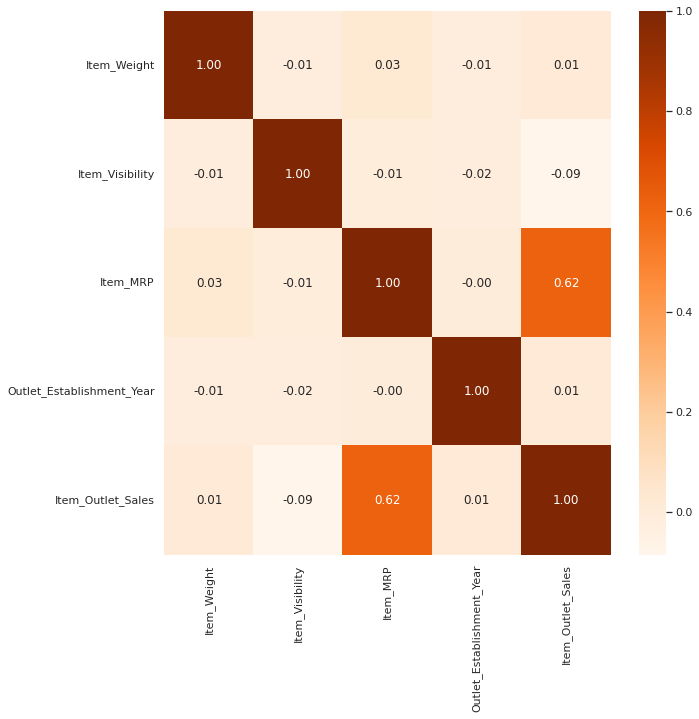

In [56]:
# Let's plot our heatmap.
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='Oranges', annot=True, fmt='.2f');

In [57]:
# As we can see, we found a moderate correlation between the sales and the list price.
# According to our heatmap, we have a weak correlation between the visibility and the sales.

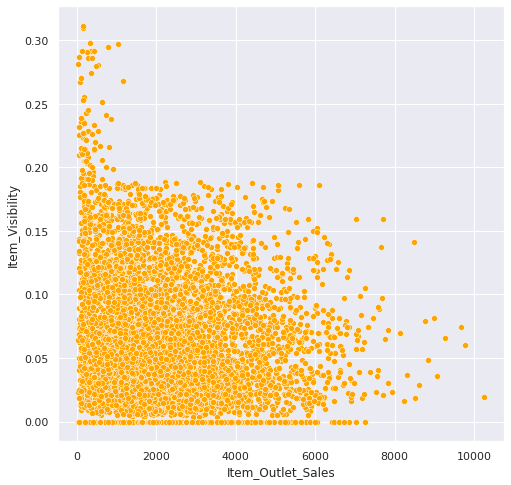

In [58]:
# Let's see what could be found if we evaluate the correlation between the visibility and sales, using a Scatter Plot.
sns.scatterplot(data=df, x='Item_Outlet_Sales', y='Item_Visibility', color='Orange');

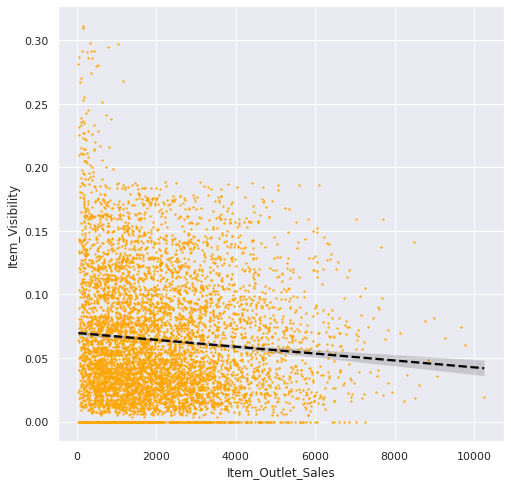

In [59]:
sns.regplot(data=df, x='Item_Outlet_Sales', y='Item_Visibility', scatter_kws={'s':2}, line_kws={'color': 'black', 'ls': '--'}, color='Orange');

In [60]:
# Both graphs confirmed the weak correlation.
# We should get deeper understanding the visibility variable (the percentage of total display area of all products in a store allocated to the particular product).